In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("/Users/Usuario/Documents/CUARTO AÑO/DATA SCIENCE/Proyecto final/synthetic_fraud_dataset 2.csv")  # Reemplaza con la ruta correcta si aplica

# Copia del dataset original
df_clean = df.copy()

# Eliminar columnas no predictivas
df_clean.drop(columns=['Transaction_ID', 'User_ID'], inplace=True)

# Convertir 'Timestamp' a datetime y extraer información útil
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['DayOfWeek'] = df_clean['Timestamp'].dt.dayofweek
df_clean.drop(columns=['Timestamp'], inplace=True)

# Variables categóricas para codificación
categorical_cols = [
    'Transaction_Type', 'Device_Type', 'Location',
    'Merchant_Category', 'Card_Type', 'Authentication_Method'
]

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Mostrar los primeros registros del dataset procesado
df_encoded.head()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,...,Merchant_Category_Electronics,Merchant_Category_Groceries,Merchant_Category_Restaurants,Merchant_Category_Travel,Card_Type_Discover,Card_Type_Mastercard,Card_Type_Visa,Authentication_Method_OTP,Authentication_Method_PIN,Authentication_Method_Password
0,39.79,93213.17,0,0,7,437.63,3,65,883.17,0.8494,...,False,False,False,True,False,False,False,False,False,False
1,1.19,75725.25,0,0,13,478.76,4,186,2203.36,0.0959,...,False,False,False,False,False,True,False,False,False,True
2,28.96,1588.96,0,0,14,50.01,4,226,1909.29,0.8400,...,False,False,True,False,False,False,True,False,False,False
3,254.32,76807.20,0,0,8,182.48,4,76,1311.86,0.7935,...,False,False,False,False,False,False,True,True,False,False
4,31.28,92354.66,0,1,14,328.69,4,140,966.98,0.3819,...,True,False,False,False,False,True,False,False,False,True


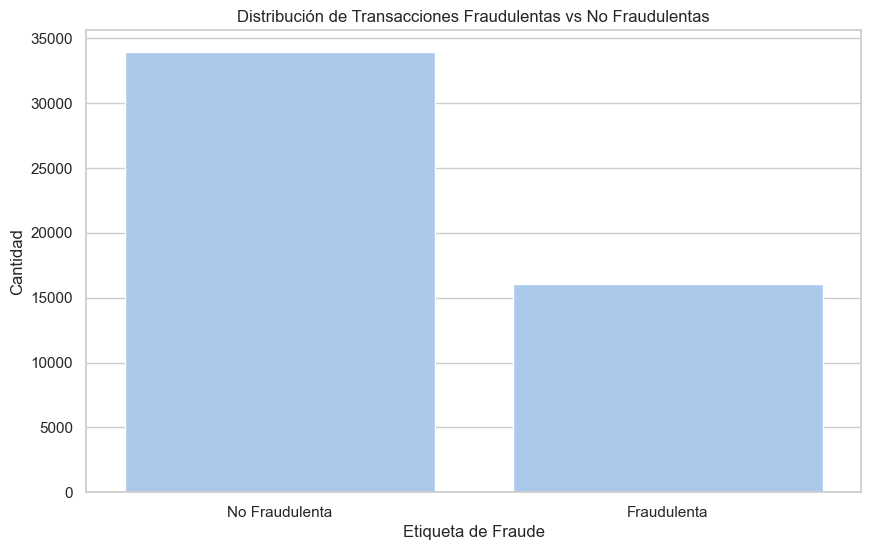

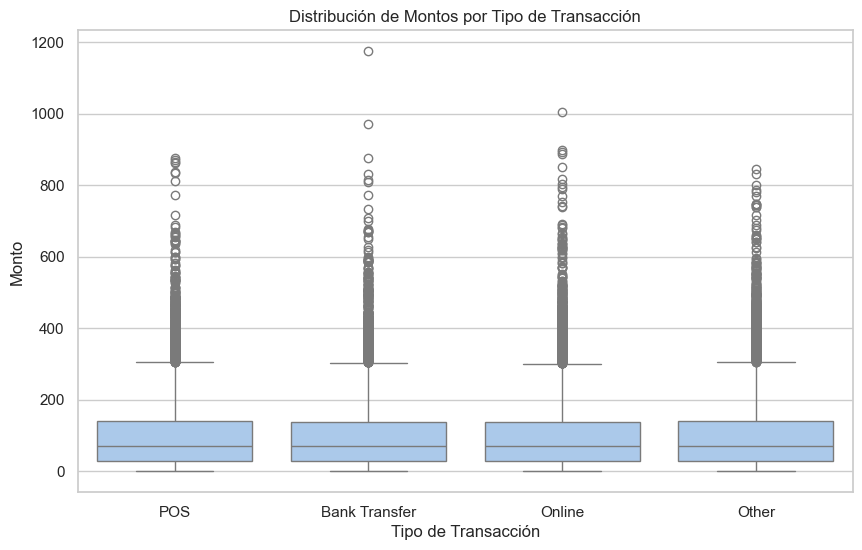

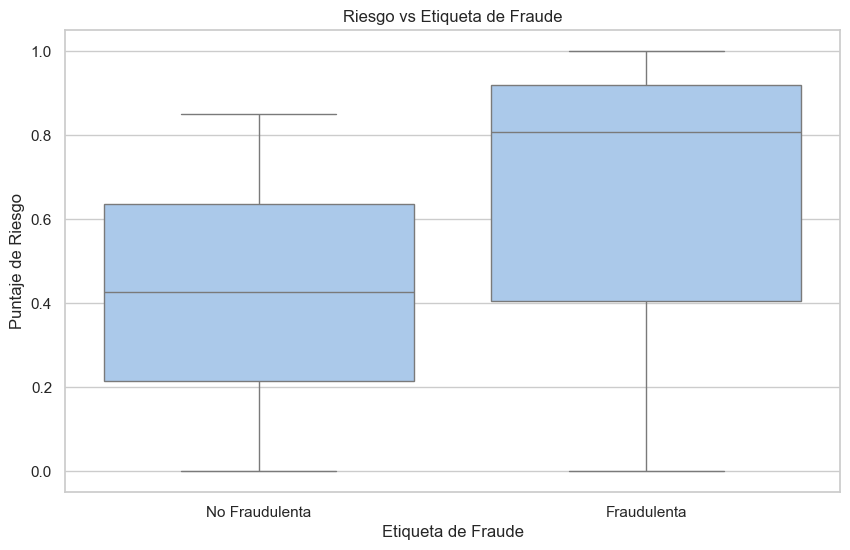

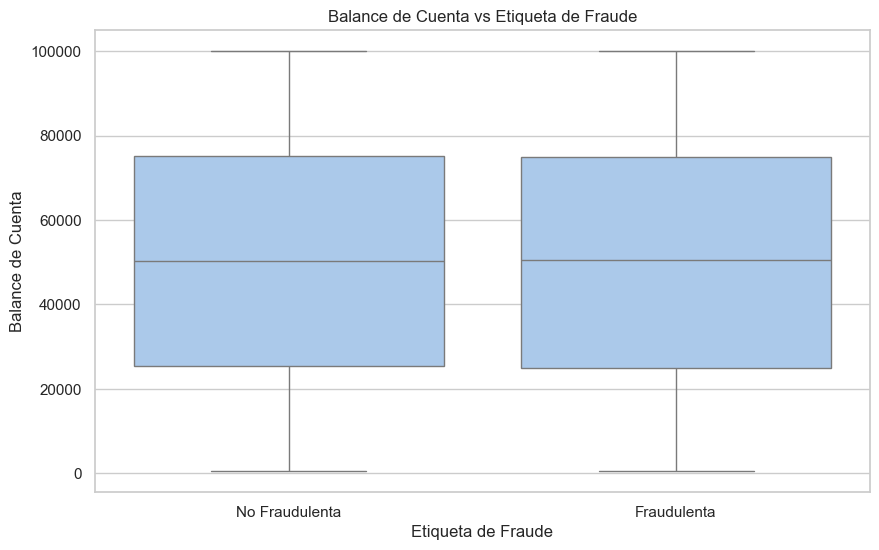

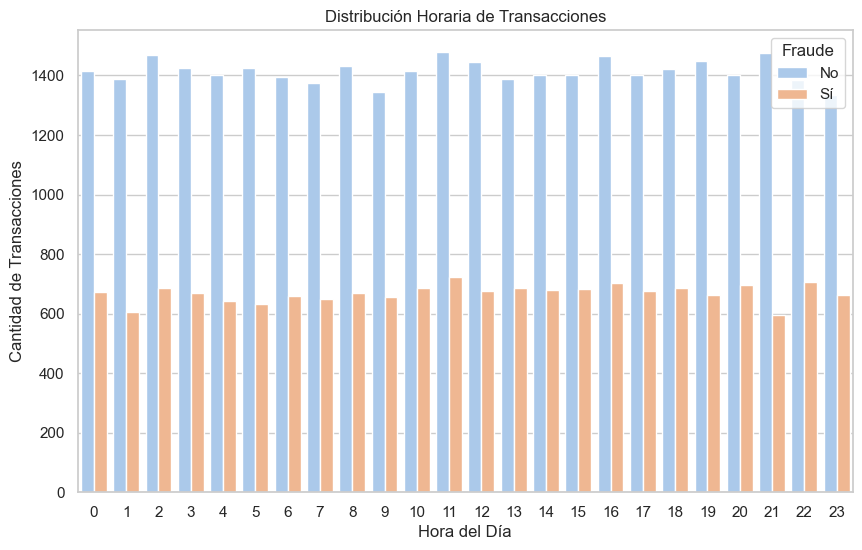

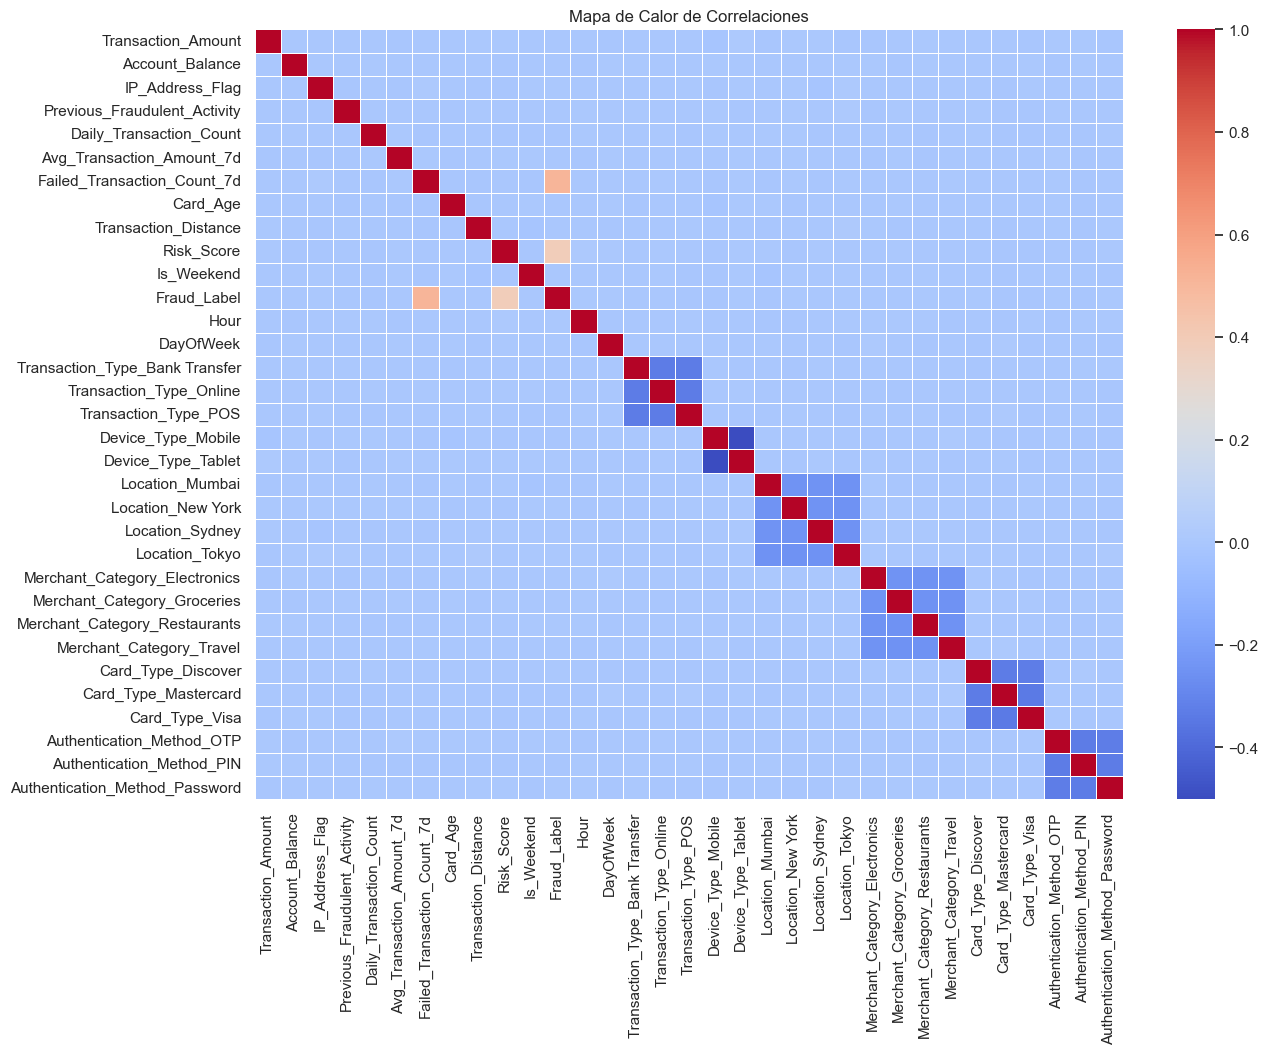

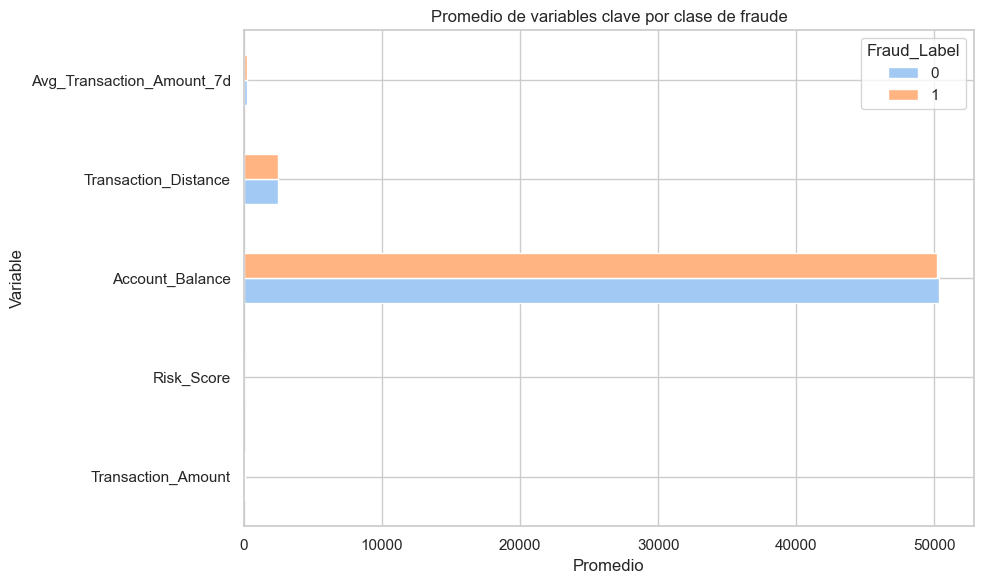

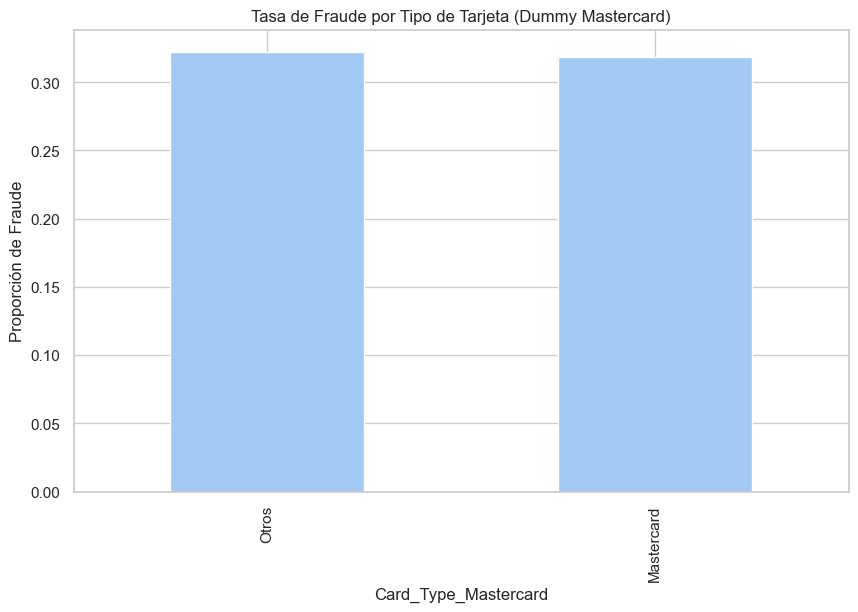

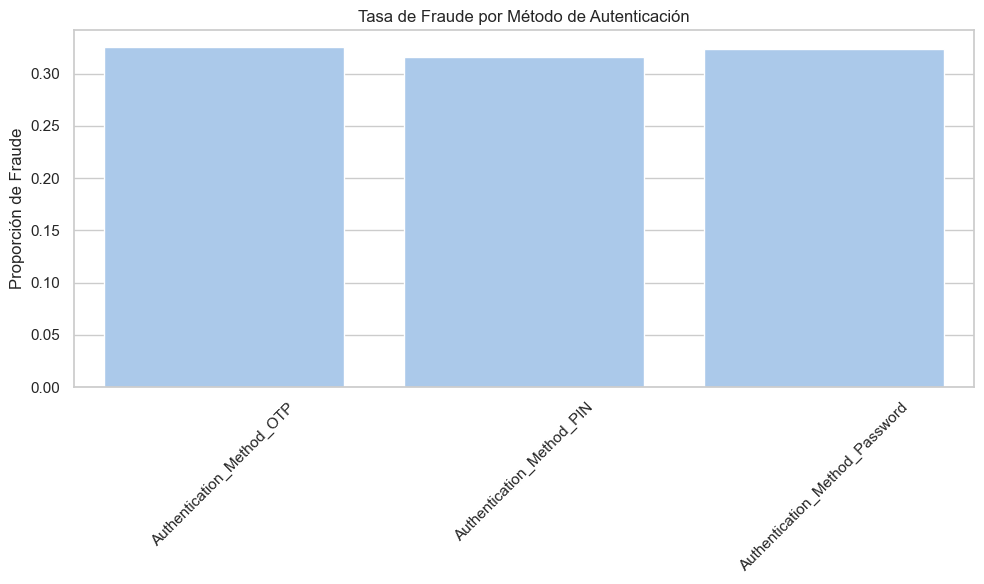

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label,Hour,DayOfWeek
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340,11.516380,3.016660
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996,6.902383,2.001165
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000,6.000000,1.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000,12.000000,3.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000,17.000000,5.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000,23.000000,6.000000


In [2]:
# EDA Completo para Detección de Fraude

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Estilo general
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# Copia del dataframe limpio
df_eda = df_encoded.copy()

# Reconstruir columna interpretativa para tipo de transacción
df_eda['Transaction_Type'] = 'Other'
df_eda.loc[df_eda['Transaction_Type_POS'] == 1, 'Transaction_Type'] = 'POS'
df_eda.loc[df_eda['Transaction_Type_Online'] == 1, 'Transaction_Type'] = 'Online'
df_eda.loc[df_eda['Transaction_Type_Bank Transfer'] == 1, 'Transaction_Type'] = 'Bank Transfer'

# 1. Distribución del target
sns.countplot(x='Fraud_Label', data=df_eda)
plt.title('Distribución de Transacciones Fraudulentas vs No Fraudulentas')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.xlabel('Etiqueta de Fraude')
plt.ylabel('Cantidad')
plt.show()

# 2. Montos por tipo de transacción
sns.boxplot(x='Transaction_Type', y='Transaction_Amount', data=df_eda)
plt.title('Distribución de Montos por Tipo de Transacción')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Monto')
plt.show()

# 3. Riesgo vs Fraude
sns.boxplot(x='Fraud_Label', y='Risk_Score', data=df_eda)
plt.title('Riesgo vs Etiqueta de Fraude')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.xlabel('Etiqueta de Fraude')
plt.ylabel('Puntaje de Riesgo')
plt.show()

# 4. Balance vs Fraude
sns.boxplot(x='Fraud_Label', y='Account_Balance', data=df_eda)
plt.title('Balance de Cuenta vs Etiqueta de Fraude')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.xlabel('Etiqueta de Fraude')
plt.ylabel('Balance de Cuenta')
plt.show()

# 5. Transacciones por hora y fraude
sns.countplot(x='Hour', hue='Fraud_Label', data=df_eda)
plt.title('Distribución Horaria de Transacciones')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Fraude', labels=['No', 'Sí'])
plt.show()

# 6. Mapa de calor de correlaciones
plt.figure(figsize=(14, 10))
corr = df_eda.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# 7. Promedio de variables clave por clase de fraude
fraude_mean_diff = df_eda.groupby('Fraud_Label')[
    ['Transaction_Amount', 'Risk_Score', 'Account_Balance',
     'Transaction_Distance', 'Avg_Transaction_Amount_7d']
].mean().T
fraude_mean_diff.plot(kind='barh', title='Promedio de variables clave por clase de fraude')
plt.xlabel('Promedio')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# 8. Tasa de fraude por tipo de tarjeta
card_fraud_rate = df_eda.groupby('Card_Type_Mastercard')['Fraud_Label'].mean()
card_fraud_rate.plot(kind='bar')
plt.title('Tasa de Fraude por Tipo de Tarjeta (Dummy Mastercard)')
plt.ylabel('Proporción de Fraude')
plt.xticks([0, 1], ['Otros', 'Mastercard'])
plt.show()

# 9. Tasa de fraude por método de autenticación
auth_cols = [col for col in df_eda.columns if 'Authentication_Method_' in col]
auth_fraud = {auth: df_eda[df_eda[auth] == 1]['Fraud_Label'].mean() for auth in auth_cols}
sns.barplot(x=list(auth_fraud.keys()), y=list(auth_fraud.values()))
plt.xticks(rotation=45)
plt.title('Tasa de Fraude por Método de Autenticación')
plt.ylabel('Proporción de Fraude')
plt.tight_layout()
plt.show()

# 10. Estadísticas descriptivas
df_eda.describe()
